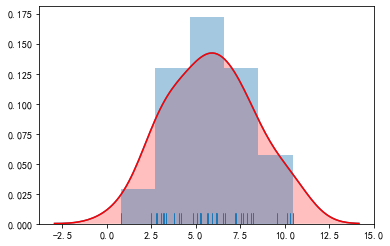

In [2]:
# -*- coding: utf-8 -*-

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Series,DataFrame
import seaborn as sns
import pymysql

plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False

#连接MySQL数据库，数据库为sales
v1 = []
v2 = []
conn = pymysql.connect(host='127.0.0.1',port=3306,user='root',password='root',db='sales',charset='utf8')
cursor = conn.cursor()

#读取数据库中的数据，数据表为orders
sql_num = "SELECT year(order_date),MONTH(order_date),ROUND(SUM(profit)/10000,2) FROM orders GROUP BY year(order_date),MONTH(order_date)"
cursor.execute(sql_num)
sh = cursor.fetchall()
for s in sh:
    v1.append(s[0])
    v2.append(s[2])

#直方图和密度图
sns.distplot(v2,hist=True,kde=True,rug=True)      #前两个默认就是True,rug是在最下方显示出频率情况，默认为False

# bins=20 表示等分为20份的效果，同样有label等等参数
sns.kdeplot(v2,shade=True,color='r')   #shade表示线下颜色为阴影,color表示颜色是红色
sns.rugplot(v2)      #在下方画出频率情况